In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from AST425 import *

In [2]:
#shape of VAE is 38, 100, 100, 2, 100, 100 38

In [3]:
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 13

In [4]:
data = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

# data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [5]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["VHELIO_AVG"]   #APOGEE
RV_err = data["VERR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE
ASPCAPFLAG = data["ASPCAPFLAG"]
STARFLAG = data["STARFLAG"]

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, ASPCAPFLAG, STARFLAG, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [6]:
ASPCAPFLAG

0             0
1             0
2             0
3         16384
4             0
          ...  
370055        0
370056    16384
370057        0
370058        0
370059        0
Name: ASPCAPFLAG, Length: 370060, dtype: int64

(Text(0.5, 0, 'Right Ascension ($\\degree$)'),
 Text(0, 0.5, 'Declination ($\\degree$)'))

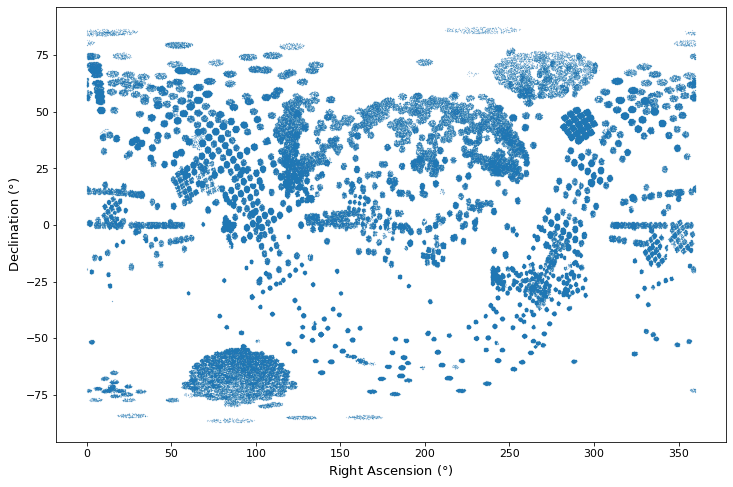

In [7]:
plt.figure(figsize = (12, 8))
plt.scatter(ra, dec, s=0.01)
plt.xlabel(r'Right Ascension ($\degree$)'), plt.ylabel('Declination ($\degree$)')
# plt.savefig('apogee_stars.png', fmt='png')

In [8]:
aspcapflags_filter = np.array(cols[20])==0
starflags_filter = np.array(cols[21])==0

filters = aspcapflags_filter*starflags_filter


filtered_data = []
for c in cols:
    a = np.array(c)[filters]
    filtered_data.append(a)
    
print("There are {} stars in our filtered sample".format(len(filtered_data[0])))

There are 144767 stars in our filtered sample


In [9]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = filtered_data[22], filtered_data[24], filtered_data[26]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = filtered_data[28], filtered_data[30], filtered_data[32]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = filtered_data[34], filtered_data[36], filtered_data[38]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = filtered_data[40], filtered_data[42], filtered_data[44]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = filtered_data[46], filtered_data[48], filtered_data[50]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = filtered_data[52], filtered_data[54], filtered_data[56], filtered_data[58]
RV_filtered  = filtered_data[9]

In [10]:
FE_H_err, C_FE_err, CI_FE_err = filtered_data[23], filtered_data[25], filtered_data[27]
N_FE_err, O_FE_err, MG_FE_err = filtered_data[29], filtered_data[31], filtered_data[33]
AL_FE_err, SI_FE_err, P_FE_err = filtered_data[35], filtered_data[37], filtered_data[39]
S_FE_err, K_FE_err, CA_FE_err = filtered_data[41], filtered_data[43], filtered_data[45]
TI_FE_err, TIII_FE_err, V_FE_err = filtered_data[47], filtered_data[49], filtered_data[51]
CR_FE_err, MN_FE_err, CO_FE_err, NI_FE_err = filtered_data[53], filtered_data[55], filtered_data[57], filtered_data[59]
RV_err  = filtered_data[10]

In [11]:
training_labels = np.transpose(np.array([FE_H_filtered[:115000], C_FE_filtered[:115000], CI_FE_filtered[:115000], 
                                        N_FE_filtered[:115000], O_FE_filtered[:115000], MG_FE_filtered[:115000],
                                        AL_FE_filtered[:115000], SI_FE_filtered[:115000], P_FE_filtered[:115000],
                                        S_FE_filtered[:115000], K_FE_filtered[:115000], CA_FE_filtered[:115000],
                                        TI_FE_filtered[:115000], TIII_FE_filtered[:115000], V_FE_filtered[:115000], 
                                        CR_FE_filtered[:115000], MN_FE_filtered[:115000], CO_FE_filtered[:115000], NI_FE_filtered[:115000]]))

error_training_labels = np.transpose(np.array([FE_H_err[:115000], C_FE_err[:115000], CI_FE_err[:115000], 
                                        N_FE_err[:115000], O_FE_err[:115000], MG_FE_err[:115000],
                                        AL_FE_err[:115000], SI_FE_err[:115000], P_FE_err[:115000],
                                        S_FE_err[:115000], K_FE_err[:115000], CA_FE_err[:115000],
                                        TI_FE_err[:115000], TIII_FE_err[:115000], V_FE_err[:115000], 
                                        CR_FE_err[:115000], MN_FE_err[:115000], CO_FE_err[:115000], NI_FE_err[:115000]]))


test_labels = np.transpose(np.array([FE_H_filtered[115000:], C_FE_filtered[115000:], CI_FE_filtered[115000:], 
                                        N_FE_filtered[115000:], O_FE_filtered[115000:], MG_FE_filtered[115000:],
                                        AL_FE_filtered[115000:], SI_FE_filtered[115000:], P_FE_filtered[115000:],
                                        S_FE_filtered[115000:], K_FE_filtered[115000:], CA_FE_filtered[115000:],
                                        TI_FE_filtered[115000:], TIII_FE_filtered[115000:], V_FE_filtered[115000:], 
                                        CR_FE_filtered[115000:], MN_FE_filtered[115000:], CO_FE_filtered[115000:], NI_FE_filtered[115000:]]))
                                     
                                     
error_test_labels = np.transpose(np.array([FE_H_err[115000:], C_FE_err[115000:], CI_FE_err[115000:], 
                                        N_FE_err[115000:], O_FE_err[115000:], MG_FE_err[115000:],
                                        AL_FE_err[115000:], SI_FE_err[115000:], P_FE_err[115000:],
                                        S_FE_err[115000:], K_FE_err[115000:], CA_FE_err[115000:],
                                        TI_FE_err[115000:], TIII_FE_err[115000:], V_FE_err[115000:], 
                                        CR_FE_err[115000:], MN_FE_err[115000:], CO_FE_err[115000:], NI_FE_err[115000:]]))

In [12]:
full_training_labels = np.c_[training_labels, error_training_labels]
full_test_labels = np.c_[test_labels, error_test_labels]

In [13]:
full_training_labels.shape

(115000, 38)

# SAMPLING LAYER

In [14]:
class Sampling(layers.Layer):
    """Uses (mean, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# ENCODER

Original encoder (mean/var -> mean/var)

In [15]:
# latent_dim = 2

# encoder_inputs = keras.Input(shape=(38,)) #to predict error, inputs is 38

# x = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)

# mean = layers.Dense(latent_dim, name="mean")(x)
# log_var = layers.Dense(latent_dim, name="log_var")(x)
# # z = Sampling()([mean, log_var])
# encoder = keras.Model(encoder_inputs, [mean, log_var], name="encoder")

In [16]:
latent_dim = 2

# (38, ) code

encoder_inputs = keras.Input(shape=(38, )) #19 x 2 instead of 38, 

# mean should only depend on mean

x_mu = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs[:,:encoder_inputs.shape[1]//2])
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)

# shape of (None, latent_dim)
mean = layers.Dense(latent_dim, name="mean")(x_mu)

# variance can take in both mean and variance

# first flatten the data
# x_log_var = tf.keras.layers.Flatten()(encoder_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# shape of (None, latent_dim)
log_var = layers.Dense(latent_dim, name="log_var")(tf.concat([x_mu, x_log_var], 1))

# mean and log var together
encoder = keras.Model(encoder_inputs, [mean, log_var], name="encoder")
encoder.summary()

# (19, 2) code (doesn't work yet, have to figure out how to get it to work)

# encoder_inputs = keras.Input(shape=(19, 2)) #19 x 2 instead of 38, 

# # 0 index slice is mu, 1 index slice is log var

# # mean should only depend on mean

# x_mu = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs[:,:,0])
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)

# # shape of (None, latent_dim)
# mean = layers.Dense(latent_dim, name="mean")(x_mu)

# # variance can take in both mean and variance

# # first flatten the data
# x_log_var = tf.keras.layers.Flatten()(encoder_inputs)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# # shape of (None, latent_dim)
# log_var = layers.Dense(latent_dim, name="log_var")(tf.concat([x_mu, x_log_var], 1))

# # first reshapes mean and log var to have shape of (1, latent_dim) each and then concatenates them so they have shape of 
# # (2, latent_dim) to put in to the decoder
# encoder = keras.Model(encoder_inputs, tf.concat([tf.reshape(mean, (1, latent_dim)), tf.reshape(log_var, (1, latent_dim))], 0), name="encoder")


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 38)]         0           []                               
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 19)          0           ['input_1[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 dense (Dense)                  (None, 100)          2000        ['tf.__operators__.getitem[0][0]'
                                                                 ]                                
                                                                                            

In [17]:
#Structure of old NN:
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='linear'),
#     tf.keras.layers.Dense(38)

# DECODER

Original decoder (mean/var -> mean/var)

In [18]:
# latent_inputs = keras.Input(shape=(2 * latent_dim,))

# x = layers.Dense(100, activation="gelu")(latent_inputs)
# x = layers.Dense(100, activation="gelu")(x)
# x = layers.Dense(100, activation="gelu")(x)
# x = layers.Dense(100, activation='gelu')(x)

# decoder_outputs = layers.Dense(38, activation="linear")(x)

# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# #decoder.summary()

Define shape as (19, 2) instead of (38, )

In [19]:
# (19, 2) instead of (38, ) code:

# latent_inputs = keras.Input(shape=(latent_dim, 2))

# x_mu = layers.Dense(100, activation="gelu")(latent_inputs[:,:,0])
# x_mu = layers.Dense(100, activation="gelu")(x_mu)
# x_mu = layers.Dense(100, activation="gelu")(x_mu)
# x_mu = layers.Dense(100, activation='gelu')(x_mu)

# mean_outputs = layers.Dense(19, activation="linear")(x_mu)

# # flatten again
# x_log_var = tf.keras.layers.Flatten()(latent_inputs)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# var_outputs = layers.Dense(19, activation="linear")(tf.concat([x_mu, x_log_var], 1))

# decoder = keras.Model(latent_inputs, [mean_outputs, var_outputs], name="decoder")

# (38, ) code

latent_inputs = keras.Input(shape=(2 * latent_dim, ))

# again only take in mean
x_mu = layers.Dense(100, activation="gelu")(latent_inputs[:,:latent_inputs.shape[1]//2])
x_mu = layers.Dense(100, activation="gelu")(x_mu)
x_mu = layers.Dense(100, activation="gelu")(x_mu)
x_mu = layers.Dense(100, activation='gelu')(x_mu)

mean_outputs = layers.Dense(19, activation="linear")(x_mu)

x_log_var = tf.keras.layers.Dense(100, activation='gelu')(latent_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

var_outputs = layers.Dense(19, activation="linear")(tf.concat([x_mu, x_log_var], 1))

decoder = keras.Model(latent_inputs, [mean_outputs, var_outputs], name="decoder")
decoder.summary()

Model: "decoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (None, 2)           0           ['input_2[0][0]']                
 icingOpLambda)                                                                                   
                                                                                                  
 dense_8 (Dense)                (None, 100)          300         ['tf.__operators__.getitem_1[0][0
                                                                 ]']                              
                                                                                            

# DEFINE VAE

In [20]:
alpha = 1e-7  # learning rate
# optimizer uses Adam with learning rate 1e-7
optimizer = tf.keras.optimizers.Adam(learning_rate = alpha)
 
def mse_loss(y_true, y_pred):
    r_loss = K.mean(K.square(y_true - y_pred), axis = [1,2,3])
    return 1000 * r_loss
 
def kl_loss(mean, log_var):
    kl_loss =  -0.5 * K.sum(1 + log_var - K.square(mean) - K.exp(log_var), axis = 1)
    return kl_loss
 
def vae_loss(y_true, y_pred, mean, var):
    r_loss = mse_loss(y_true, y_pred)
    kl_loss = kl_loss(mean, log_var)
    return  r_loss + kl_loss

Custom loss function (KL divergence):

In [21]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss") 
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            # encode
            z_mean, z_log_var = self.encoder(data)
            # decode
            # reconstruction = self.decoder(tf.concat([z_mean, z_log_var], 1))
            # currently doing univariate KL-loss in each dimension and then summing up over 19 dimensions
            
            ## KL divergence reconstruction loss:
        
            # get the mean and log variances from the original data and the reconstruction
            # data
            data_mean = data[:,:data.shape[1]//2]
            data_log_var = data[:,data.shape[1]//2:]
            # reconstruction
            rec_mean, rec_log_var = self.decoder(tf.concat([z_mean, z_log_var], 1))
            # rec_mean = reconstruction[:,:reconstruction.shape[1]//2]
            # rec_log_var = reconstruction[:,reconstruction.shape[1]//2:]       
            
            # compute the kl divergence of the reconstructed distribution (mean/var) compared to the original distribution
            # p is the reconstruction, q is the original data (p is 0, q is 1)
            # reconstruction_loss = 0.5 * (rec_log_var - data_log_var + ((tf.exp(data_log_var) + tf.square(data_mean - rec_mean))/tf.exp(rec_log_var)) - 1)
            reconstruction_loss = 0.5 * (data_log_var - rec_log_var + ((tf.exp(rec_log_var) + tf.square(rec_mean - data_mean))/tf.exp(data_log_var)) - 1)
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(reconstruction_loss, axis=1))

            ## MSE reconstruction loss:    
            
#             reconstruction_loss = tf.reduce_mean(
#                 tf.reduce_sum(
#                     keras.losses.MSE(data, reconstruction) # for custom loss, average over 1 axis, change to custom loss here
#                 )
#             )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# TRAIN

Full training/testing data:

In [22]:
# for the (None, 38) shape vae

full_train = np.c_[training_labels, 2 * np.log(error_training_labels)]  # convert to log variance
full_test = np.c_[test_labels, 2 * np.log(error_test_labels)]

# try this to remove some of the small variances that might make the kl term blow up
full_train_mod = full_train[full_train[:,full_train.shape[1]//2] > np.log(1/4000)]
# 4000 based on the histograms above


# for the (19, 2) shape vae

# this gives (batch_size, 19, 2)
# full_train = np.stack((training_labels, 2 * np.log(error_training_labels)), axis=2)
# full_test = np.stack((test_labels, 2 * np.log(error_test_labels)), axis=2)

In [23]:
np.array(np.where(full_train[:,full_train.shape[1]//2] < np.log(1/4000))).shape, full_train.shape

((1, 1563), (115000, 38))

In [24]:
full_train_var = np.sort(tf.exp(full_train[:,full_train.shape[1]//2:]))

<Figure size 1440x1440 with 0 Axes>

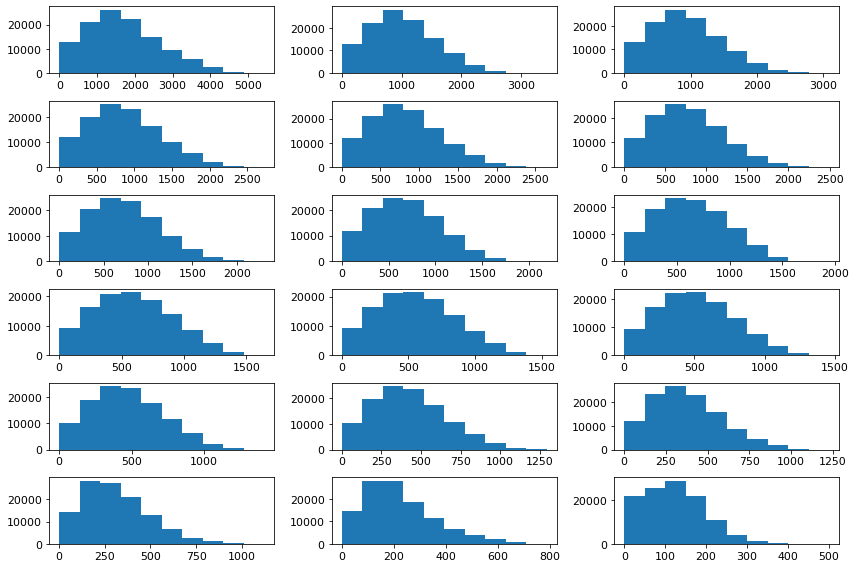

In [25]:
plt.figure(figsize = (20, 20))
fig, ax = plt.subplots(6, 3)
for i in range(6):
    for j in range(3):
        ax[i, j].hist((1/full_train_var)[:, 3*i + j])
        
plt.tight_layout()
plt.show()


In [26]:
full_train[:,full_train.shape[1]//2][full_train[:,full_train.shape[1]//2] > np.log(1/4000)].shape

(113437,)

In [27]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(full_train_mod, epochs=100, batch_size=256)


Epoch 1/100
444/444 [==============================] - 9s 15ms/step - loss: 703.2324 - reconstruction_loss: 157.1352 - kl_loss: 12.2296
Epoch 2/100
444/444 [==============================] - 6s 13ms/step - loss: 6.6947 - reconstruction_loss: 5.6546 - kl_loss: 0.7347
Epoch 3/100
444/444 [==============================] - 6s 13ms/step - loss: 5.8990 - reconstruction_loss: 5.5224 - kl_loss: 0.3134
Epoch 4/100
444/444 [==============================] - 6s 14ms/step - loss: 5.6877 - reconstruction_loss: 5.4699 - kl_loss: 0.1718
Epoch 5/100
444/444 [==============================] - 5s 12ms/step - loss: 5.5457 - reconstruction_loss: 5.4075 - kl_loss: 0.1111
Epoch 6/100
444/444 [==============================] - 6s 13ms/step - loss: 5.4494 - reconstruction_loss: 5.3506 - kl_loss: 0.0789
Epoch 7/100
444/444 [==============================] - 6s 13ms/step - loss: 5.3860 - reconstruction_loss: 5.3004 - kl_loss: 0.0597
Epoch 8/100
444/444 [==============================] - 5s 12ms/step - loss: 5.

444/444 [==============================] - 7s 16ms/step - loss: 4.6068 - reconstruction_loss: 4.6024 - kl_loss: 0.0101
Epoch 64/100
444/444 [==============================] - 7s 16ms/step - loss: 4.6408 - reconstruction_loss: 4.6029 - kl_loss: 0.0103
Epoch 65/100
444/444 [==============================] - 6s 14ms/step - loss: 4.6072 - reconstruction_loss: 4.5905 - kl_loss: 0.0101
Epoch 66/100
444/444 [==============================] - 5s 12ms/step - loss: 4.6035 - reconstruction_loss: 4.5924 - kl_loss: 0.0100
Epoch 67/100
444/444 [==============================] - 5s 12ms/step - loss: 4.6910 - reconstruction_loss: 4.6282 - kl_loss: 0.0102
Epoch 68/100
444/444 [==============================] - 5s 12ms/step - loss: 4.6211 - reconstruction_loss: 4.5880 - kl_loss: 0.0099
Epoch 69/100
444/444 [==============================] - 5s 12ms/step - loss: 4.5941 - reconstruction_loss: 4.5837 - kl_loss: 0.0098
Epoch 70/100
444/444 [==============================] - 6s 13ms/step - loss: 4.5990 - rec

In [28]:
# save the model?
encoder.save('encoder', save_format='tf')
decoder.save('decoder', save_format='tf')

INFO:tensorflow:Assets written to: encoder/assets
INFO:tensorflow:Assets written to: decoder/assets


In [29]:
testmean, testvar = encoder(full_test)
test_reconstruction_mean, test_reconstruction_var = decoder(tf.concat([testmean, testvar], 1))
# assemble them into one array
test_reconstruction = np.concatenate((test_reconstruction_mean, test_reconstruction_var), axis = 1)

full_test, test_reconstruction_mean, test_reconstruction_var

(array([[ 0.16089709, -0.0462888 , -0.13949211, ..., -6.22354941,
         -6.8697833 , -6.36133062],
        [-0.2159388 , -0.01849935, -0.0909799 , ..., -5.79970876,
         -3.96868924, -6.41661731],
        [-0.2329385 , -0.01623659, -0.05243784, ..., -6.76191635,
         -7.34842619, -7.09034521],
        ...,
        [-0.05302382, -0.10000517, -0.13376433, ..., -6.34078684,
         -7.13295016, -6.85875956],
        [-0.42941615, -0.07686421, -0.06466031, ..., -6.42949621,
         -6.39755776, -6.74924354],
        [-0.12155101, -0.09844092, -0.12906697, ..., -6.80896344,
         -7.54796901, -7.21599673]]),
 <tf.Tensor: shape=(29767, 19), dtype=float32, numpy=
 array([[ 0.15976125, -0.03840335, -0.10935603, ...,  0.06836214,
          0.09249609,  0.02735733],
        [-0.20995952, -0.02570075, -0.06100158, ..., -0.03498909,
          0.03846867,  0.02176636],
        [-0.22875625, -0.06782137, -0.09925402, ..., -0.01121931,
          0.06903569,  0.00988442],
        ...,


# PLOTS

Residuals:

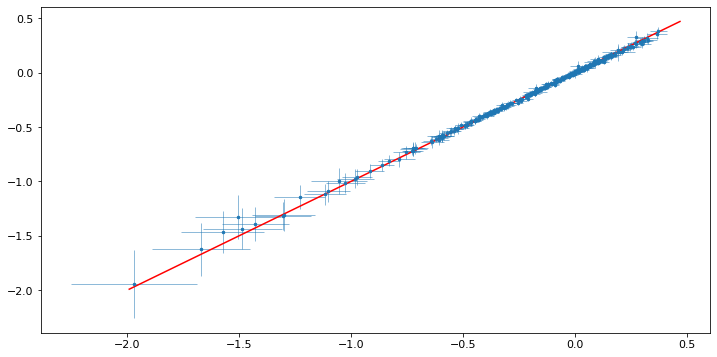

In [30]:
ind = 0  # 19 parameters, 0 to 18
samp_rate = 100

plt.figure(figsize = (12, 6))
plt.errorbar(full_test[:,ind][::samp_rate], test_reconstruction[:,ind][::samp_rate], xerr=np.exp(full_test[:,ind+19][::samp_rate]/2), yerr=np.exp(test_reconstruction[:,ind+19][::samp_rate]/2), fmt='.', markersize=5, elinewidth=0.5)
# plt.plot(np.linspace(0., 0.3, int(1e4)), np.linspace(0., 0.3, int(1e4)), c='r')
plt.plot(np.linspace(np.min(full_test[:,ind]), np.max(full_test[:,ind]), int(1e5)), np.linspace(np.min(full_test[:,ind]), np.max(full_test[:,ind]), int(1e5)), c='r')

# plt.xlim(-0.5, 0.4)
# plt.ylim(-0.5, 0.4)

<ipython-input-64-945384a3e3c7>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('metallicity_original_vs_reconstructed_one_vertical.png', fmt='png')


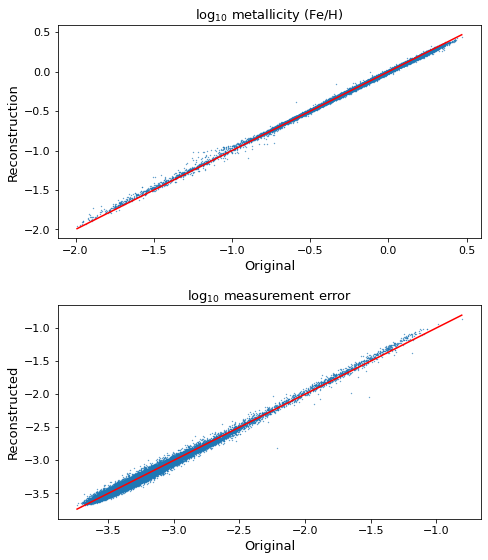

In [64]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (7, 8))
# plot the metallicity
ax0.scatter(full_test[:,0], test_reconstruction[:,0], s=0.1)
ax0.plot(np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), c='r')
ax0.set_xlabel('Original'), ax0.set_ylabel('Reconstruction')
ax0.set_title(r'$\log_{10}$ metallicity (Fe/H)'), ax1.set_title(r'$\log_{10}$ measurement error')
# plot the variance
ax1.scatter(np.log10(np.exp(full_test[:,19])), np.log10(np.exp(test_reconstruction[:,19])), s=0.1)
ax1.plot(np.linspace(np.log10(np.exp(np.min(full_test[:,19]))), np.log10(np.exp(np.max(full_test[:,19]))), int(1e5)), 
         np.linspace(np.log10(np.exp(np.min(full_test[:,19]))), np.log10(np.exp(np.max(full_test[:,19]))), int(1e5)), c='r')
ax1.set_xlabel('Original'), ax1.set_ylabel('Reconstructed')
plt.tight_layout()
plt.savefig('metallicity_original_vs_reconstructed_one_vertical.png', fmt='png')

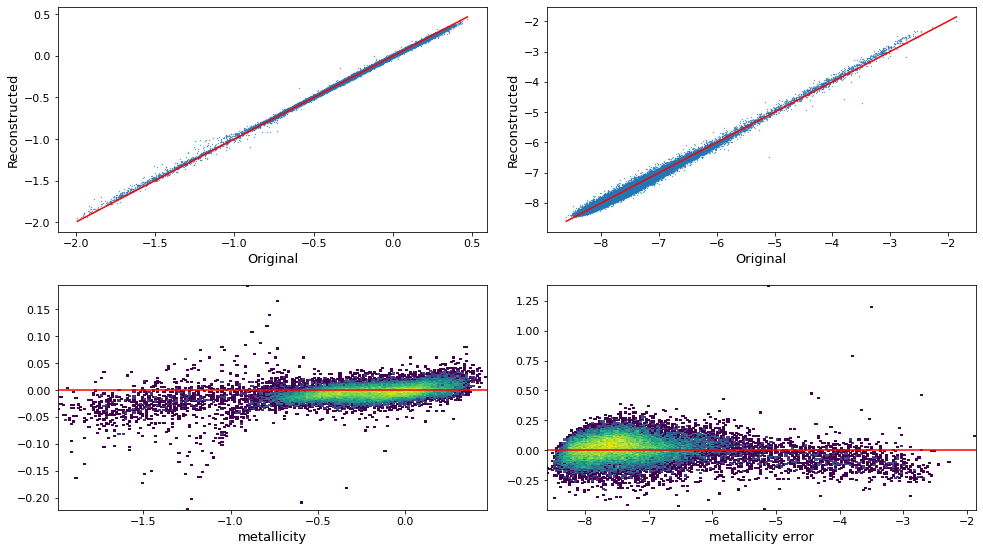

In [31]:
import matplotlib as mpl
plt.rc('font', size=18)

fig = plt.figure(figsize = (14, 8))
# ax = fig.add_subplot(111)    # The big subplot
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# invisible big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# plot the metallicity
ax0.scatter(full_test[:,0], test_reconstruction[:,0], s=0.1)
ax0.plot(np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), c='r')
ax0.set_xlabel('Original'), ax0.set_ylabel('Reconstructed')
# plot the variance
ax1.scatter(full_test[:,19], test_reconstruction[:,19], s=0.1)
ax1.plot(np.linspace(np.min(full_test[:,19]), np.max(full_test[:,19]), int(1e5)), np.linspace(np.min(full_test[:,19]), np.max(full_test[:,19]), int(1e5)), c='r')
ax1.set_xlabel('Original'), ax1.set_ylabel('Reconstructed')
# plot the residuals of metallicity
ax2.hist2d(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], norm=mpl.colors.LogNorm(), bins=200)
ax2.set_xlabel(r'metallicity')
# ax2.scatter(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], s=10)
ax2.axhline(0, c='r')
# plot the residuals of variance
ax3.hist2d(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], norm=mpl.colors.LogNorm(), bins=200)
# ax3.scatter(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], s=10)
ax3.axhline(0, c='r')
ax3.set_xlabel(r'metallicity error')
# ax.set_xlabel('Original'), ax.set_ylabel('Reconstructed')
plt.tight_layout()
plt.savefig('metallicity_original_vs_reconstructed_all.png')

In [32]:
np.std(full_test[:,0] - test_reconstruction[:,0])

0.013412211601342545

In [33]:
np.mean(full_test[:,0] - test_reconstruction[:,0]), np.mean(full_test[:,19] - test_reconstruction[:,19])

(-0.0037325488840810267, 0.015299675050879386)

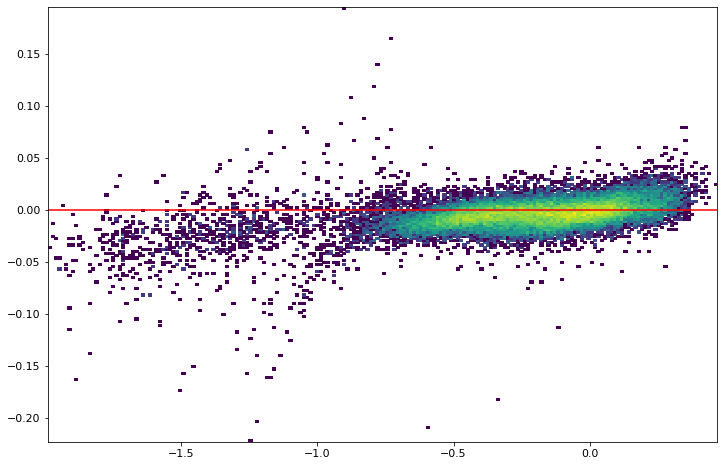

In [34]:
plt.hist2d(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], norm=mpl.colors.LogNorm(), bins=200)
# plt.scatter(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], s=10)
plt.axhline(0, c='r')
# plt.savefig('residuals.png', fmt='png')
plt.show()

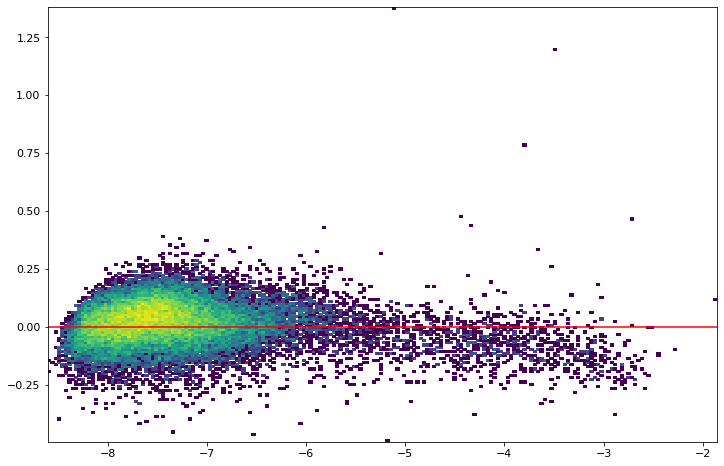

In [35]:
plt.hist2d(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], norm=mpl.colors.LogNorm(), bins=200)
# plt.scatter(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], s=10)
plt.axhline(0, c='r')
plt.show()

In [36]:
test_labels.shape

(29767, 19)

<ipython-input-37-3b5663c90a88>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('original_vs_reconstructed_all_abundances.png', fmt='png')


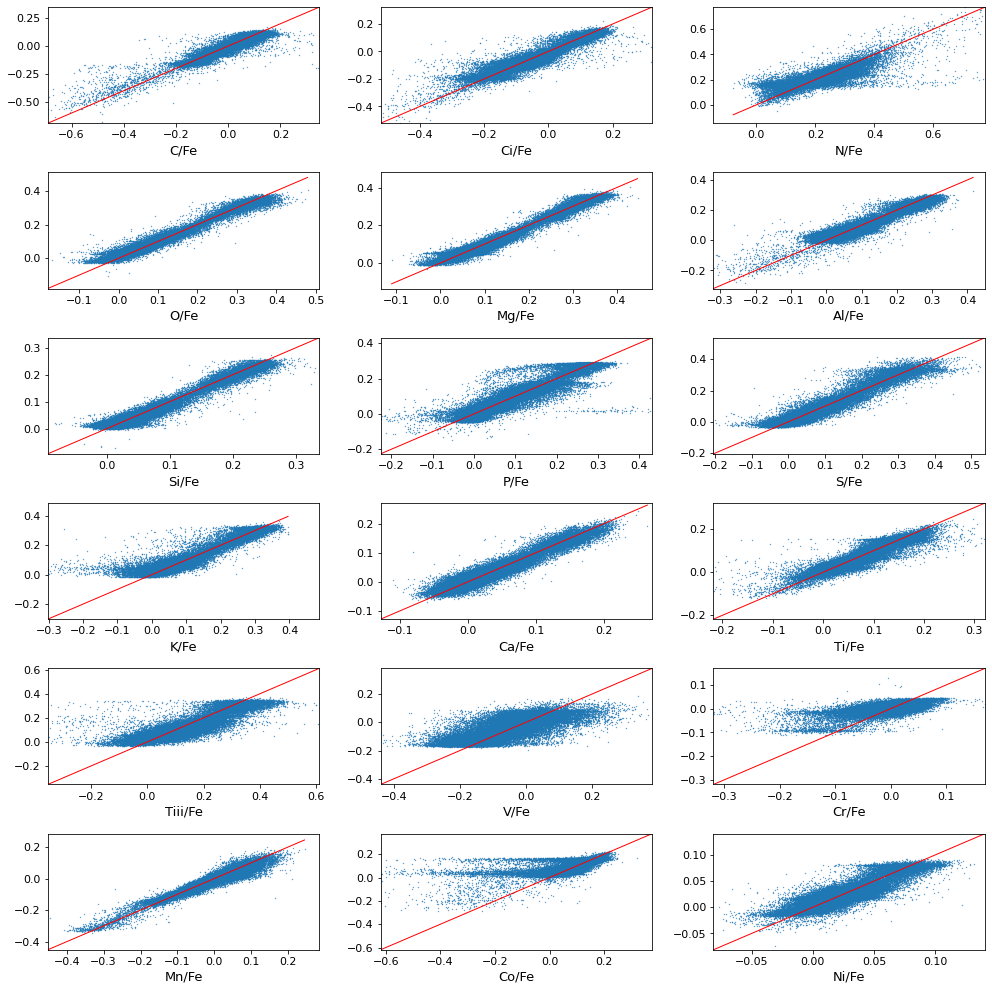

In [37]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
divisor = 4  # fraction of the range to scale the plots by
samp_rate = 1

# set this to 1 to plot the measurements, 20 to plot the errors
error = 1

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
for i in range(6):
    for j in range(3):
#         ax[i, j].errorbar(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], 
#                           xerr=np.exp(full_test[:,3*i+j+error+error9][::samp_rate]/2), 
#                           yerr=np.exp(test_reconstruction[:,3*i+j+error+error9][::samp_rate]/2), 
#                           fmt='.', markersize=5, elinewidth=0.5)
        ax[i, j].scatter(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], s=0.1)
        ax[i, j].plot(np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), 
                      np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), c='r', linewidth=1)
        # label
        ax[i, j].set_xlabel(abundances[3*i+j+error])# , ax[i, j].set_ylabel('Reconstructed')       
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(full_test[:,3*i+j+error], (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # scale it
        ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        
plt.tight_layout()
plt.savefig('original_vs_reconstructed_all_abundances.png', fmt='png')
plt.show()

In [38]:
for i in range(0, 18):
    print(np.mean(full_test[:,i] - test_reconstruction[:,i]))

-0.0037325488840810267
0.004195963844394587
0.00014781491266690276
-0.001543369543168278
-0.0038357148876537787
0.0009715575430373299
0.0029158350146473206
0.0005486895223986392
-0.0005621356362315635
-0.0029651611191193143
-0.0075564233171988215
-0.0006649563681327906
0.0013558847190211847
0.006811651797186038
-0.012005133419694565
-0.010255198719364589
-0.00022931228044340915
-0.02988558561756491


<ipython-input-39-b172067d14b4>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('original_vs_reconstructed_all_errors.png', fmt='png')


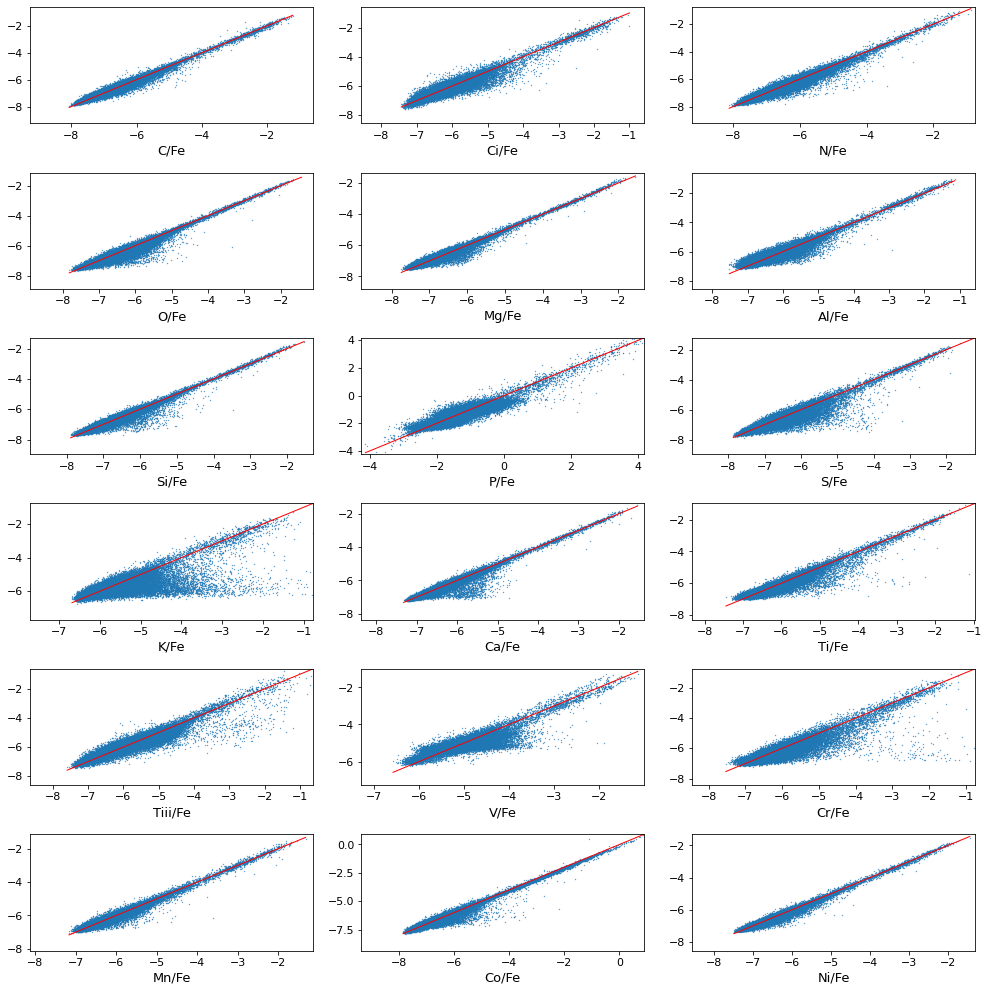

In [39]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
divisor = 4  # fraction of the range to scale the plots by
samp_rate = 1

# set this to 1 to plot the measurements, 20 to plot the errors
error = 20

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
for i in range(6):
    for j in range(3):
#         ax[i, j].errorbar(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], 
#                           xerr=np.exp(full_test[:,3*i+j+error+error9][::samp_rate]/2), 
#                           yerr=np.exp(test_reconstruction[:,3*i+j+error+error9][::samp_rate]/2), 
#                           fmt='.', markersize=5, elinewidth=0.5)
        ax[i, j].scatter(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], s=0.1)
        ax[i, j].plot(np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), 
                      np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), c='r', linewidth=1)
        # label
        ax[i, j].set_xlabel(abundances[3*i+j+1])# , ax[i, j].set_ylabel('Reconstructed')       
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(full_test[:,3*i+j+error], (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # scale it
        ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        
plt.tight_layout()
plt.savefig('original_vs_reconstructed_all_errors.png', fmt='png')
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-7.32536779, -7.29645317, -7.26753856, -7.23862394, -7.20970933,
        -7.18079472, -7.1518801 , -7.12296549, -7.09405087, -7.06513626,
        -7.03622164, -7.00730703, -6.97839241, -6.9494778 , -6.92056319,
        -6.89164857, -6.86273396, -6.83381934, -6.80490473, -6.77599011,
        -6.7470755 , -6.71816089, -6.68924627, -6.66033166, -6.63141704,
        -6.60250243, -6.57358781, -6.5446732 , -6.51575859, -6.48684397,
        -6.45792936, -6.42901474, -6.40010013, -6.37118551, -6.3422709 ,
        -6.31335628, -6.28444167, -6.25552706, -6.22661244, -6.19769783,
        -6.16878321, -6.1398686 , -6.11095398, -6.08203937, -6.05312476,
        -6.02421014, -5.99529553, -5.96638091, -5.9374663 , -5.90855168,
        -5.87963707, 

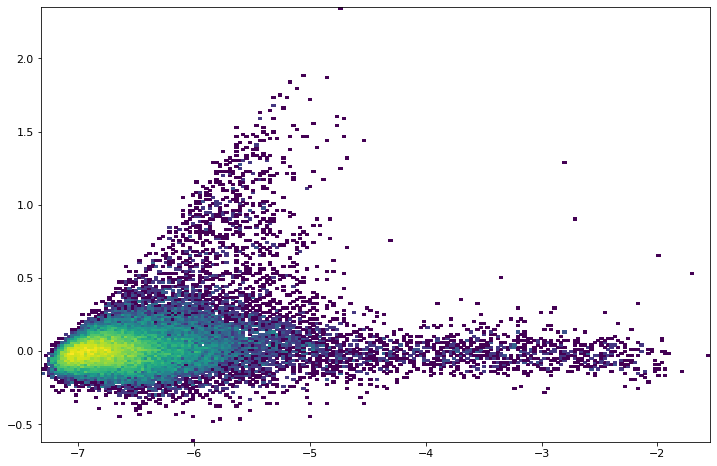

In [40]:
plt.hist2d(full_test[:,30], full_test[:,30] - test_reconstruction[:,30], norm=mpl.colors.LogNorm(), bins=200)

In [41]:
for i in range(19, 38):
    print(np.mean(full_test[:,i] - test_reconstruction[:,i]))

0.015299675050879386
-0.0029524655154743186
0.01725178395370486
0.055386414878651105
0.0561433910854108
-0.0014174002506997165
-0.058702296918150994
0.008356795104007336
0.05679303023360358
0.0585411836682315
0.1858859797659529
0.036942486000946725
0.06602047537271044
0.04376226785035311
0.018907996639562368
0.1348942797738797
0.01355782161626071
0.0332066535561138
0.032011492393822887


2D means of latent space points with errorbars given by their corresponding variances and coloured by some abundance:

<ErrorbarContainer object of 3 artists>

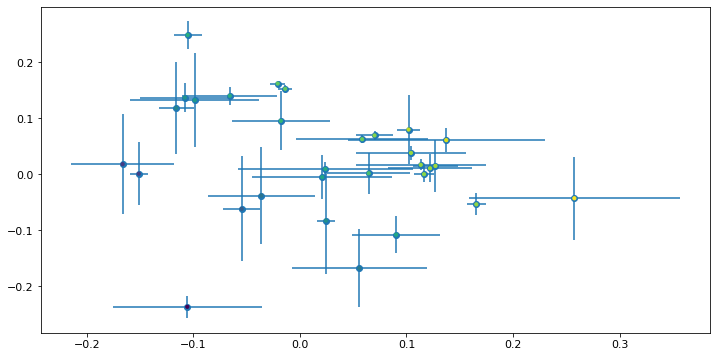

In [42]:
ind = 0  # index of parameter to colour by

plt.figure(figsize = (12, 6))
plt.scatter(testmean[:,0][::1000], testmean[:,1][::1000], c=full_test[:,ind][::1000], s=10, zorder=2)
plt.errorbar(testmean[:,0][::1000], testmean[:,1][::1000], xerr=testvar[:,0][::1000], yerr=testvar[:,1][::1000], fmt='o', zorder=1)